In [248]:
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

img1 = io.imread("HW2_DegradedImage.jpeg")
img2 = io.imread("HW2_Head.tif")
img1 = rgb2gray(img1)


def fromfreq(image):
    #Shifts fourier representation back
    shifted = np.fft.ifftshift(image)
    #Runs reverse fft and converts to real numbers
    filtered_image = np.fft.ifft2(shifted).real
    return filtered_image

def tofreq(image):
    fourier = np.fft.fft2(image)
    return np.fft.fftshift(fourier)


This was quite a tough question. I started with an ideal filter, but that had all sorts of fragments that you get from an ideal filter. Then I played around with some gaussian bandstop filters, as well as butterworth, etc but none of them worked. I noticed that the noise was on a -45 degree line, so I added that as a component of my ideal filter, trying to be as conservative as possible with what I reject, and I neutralized the noise

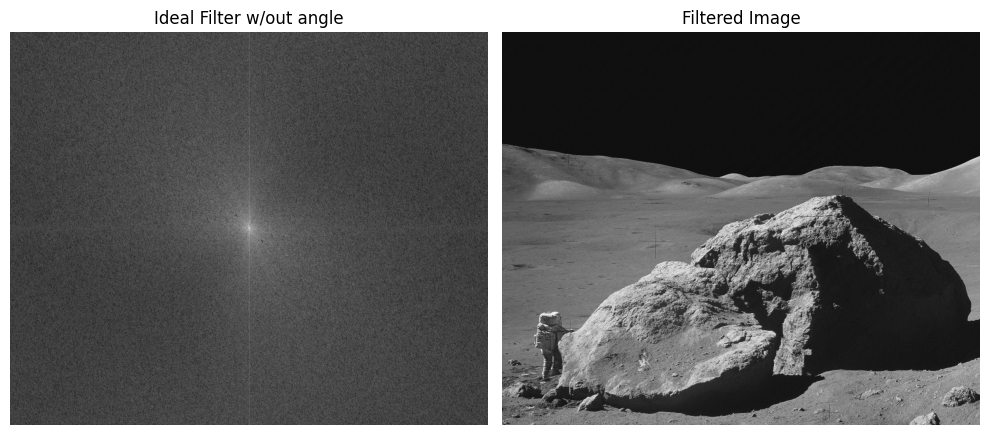

In [249]:
def dist(p1, p2):
    return np.sqrt(np.sum((np.array(p1) - np.array(p2))**2))

def ideal(img, bigrad=40, smallrad=35):
    h, w = img.shape
    #Array of ones the same size as the image. The idea is that you zero out only the necessary values
    radiusfilter = np.ones((h, w))
    center = (h / 2, w / 2)

    for idx in range(h):
        for idx2 in range(w):
            # If within radius and not on the -45 degree line
            distance = dist((idx, idx2), center)
            if distance >= smallrad and distance <= bigrad:
                # Check if the point is on the -45 degree line
                # if dist((idx,idx2),center) > smallrad:
                if idx - idx2 == center[0] - center[1]:
                    radiusfilter[idx, idx2] = 0
    return radiusfilter

def reveal(img,filterfunc,name,**kwargs):
    freq1 = tofreq(img)
    freqvals = np.log(1+np.abs(freq1))
    filt = filterfunc(img,**kwargs)
    freqimg1 = filt * freqvals
    freqimg2 = filt * freq1

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(freqimg1, cmap='gray') 
    axes[0].axis('off')
    axes[0].set_title(name)
    axes[1].imshow(fromfreq(freqimg2), cmap='gray') 
    axes[1].axis('off')
    axes[1].set_title("Filtered Image")
    plt.tight_layout()
    # plt.imsave(f"{name}.jpg",freqimg1)
    plt.show()
reveal(img1,ideal,name="Ideal Filter w/out angle")
# reveal(img1,gaussian_bandstop_filter,name="Gaussian Filter",)
# reveal(img1,butterworth_filter,name="Butterworth Filter")
# reveal(img1,band_reject_filter,name="IDeal w/ smoothing Filter")

<b>Question 2</b>

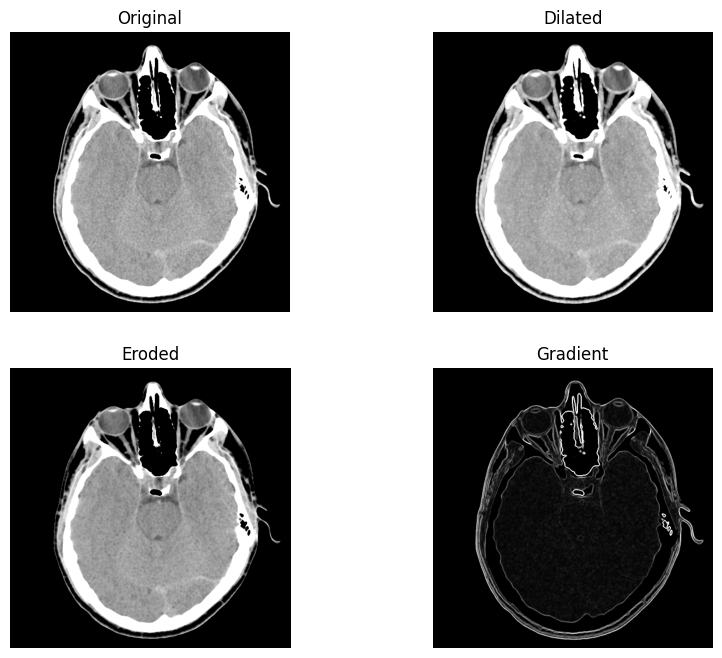

In [250]:
import skimage.morphology as mp

img2_dilated = mp.dilation(img2)
img2_eroded = mp.erosion(img2)
images = [img2,img2_dilated,img2_eroded,img2_dilated - img2_eroded]
labels = ["Original","Dilated","Eroded","Gradient"]
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    
    if labels is not None:
        ax.set_title(labels[i])